# 画像検索評価システム

In [154]:
import matplotlib.pyplot as plt
import pickle

In [3]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


## ユークリッド距離計算

In [92]:
import numpy as np

def distance(x, y):
  return np.sqrt(np.sum((x - y) ** 2, axis=-1))

## 1番近い画像ベクトルを探索

In [93]:
def search(v, vecs):
  b = distance(v, vecs[0])
  d = 0
  for i in range(0, len(vecs)):
    a = distance(v, vecs[i])
    if a < b:
      b = a
      d = i
  return d

In [ ]:
#search(vecs[30], vecs)

In [ ]:
#distance(vecs[0:10000], vecs)

## 評価

最も近い上位num件のベクトルのインデックス

In [145]:
def top_index(v, vecs, num):
  return np.argsort(distance(v, vecs))[:num]

- 上位5件
- ラベルが同じか確認する
- 同じものがいくつあるかカウントする

In [146]:
import numpy as np
def evaluate_sum(vecs):
  result = 0
  for j in range(0,10000):
    top5 = top_index(vecs[j], vecs, 5)
    for index in top5:
      if y_test[j] == y_test[index]:
        result += 1
  return result
    
"""
    result = np.argsort(distance(vecs[j], vecs))
    for i in range(5):
      if y_test[j] == y_test[result[i]]:
        s += 1
      #plt.figure()
      #print(y_test[result])
      #plt.imshow(x_test[result[i]])
  return s
"""

'\n    result = np.argsort(distance(vecs[j], vecs))\n    for i in range(5):\n      if y_test[j] == y_test[result[i]]:\n        s += 1\n      #plt.figure()\n      #print(y_test[result])\n      #plt.imshow(x_test[result[i]])\n  return s\n'

## 100次元

In [137]:
with open('cifar10_vecs100.pickle', 'rb') as f:
  vecs = pickle.load(f)

scoreにカウントした数を格納

In [142]:
score = evaluate_sum(vecs)

In [143]:
score

24246

- 割合

- 10000引いているのは，同じ画像も含まれてしまっているため．

In [144]:
(score-10000) /(50000-10000) *100

35.615

## 1000次元

In [131]:
with open('cifar10_vecs1000.pickle', 'rb') as f:
  vecs = pickle.load(f)

In [ ]:
score = evaluate_sum(vecs)

In [119]:
(score-10000) /(50000-10000) *100

41.5975

## 上位5件の画像を表示

[   0 4879 5411 7309  106]


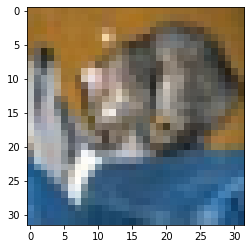

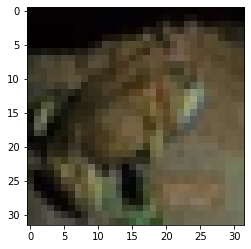

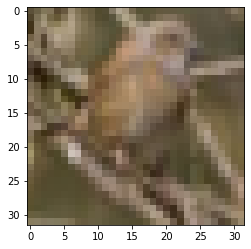

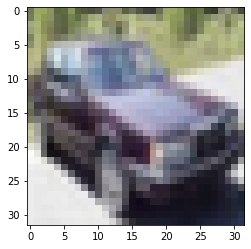

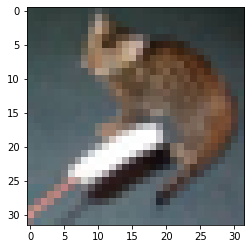

In [153]:
top5 = top_index(vecs[0], vecs, 5)
print(top5)
for index in top5:
  plt.figure()
  plt.imshow(x_test[index])

## 下記は関係ない

In [69]:
y_test[0]

array([3], dtype=uint8)

In [70]:
y_test[d]

array([3], dtype=uint8)

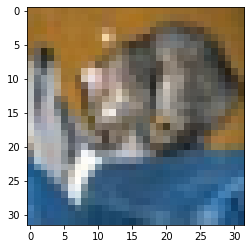

In [71]:
plt.imshow(x_test[0])

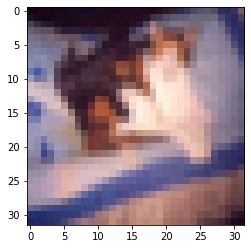

In [72]:
plt.imshow(x_test[d])